Importing Dependencies 


In [181]:
import numpy as np


Model Class

In [182]:
class LogisticRegression:

    def __init__(self,learning_rate , no_of_iter):
        self.learning_rate = learning_rate
        self.no_of_iter = no_of_iter


    def fit(self,X,Y):
        #here m = no. of training data and n = no. of features in the dataset
        self.m,self.n = X.shape

        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y

        for i in range(self.no_of_iter):
            self.UpdateWeights()


    def UpdateWeights(self):
        Y_cap = 1/(1+np.exp(-(self.X.dot(self.w) + self.b)))
        #gradient dw and db calculation 
        dw = (1/ self.m) * np.dot(self.X.T , (Y_cap - self.Y))
        db = (1/self.m) * np.sum(Y_cap - self.Y)

        #updating weights and bias 
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db


    def predict(self,X):
        Y_pred = 1 / (1 + np.exp(- (X.dot(self.w) + self.b)))
        Y_pred = np.where(Y_pred> 0.5 ,1,0)
        return Y_pred


## Model Implementation

# Data collection and Analysis 

In [183]:
#importing dependecies 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix


In [184]:
data = pd.read_csv('LogisticRegression/diabetes.csv')

In [185]:
data.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [186]:
data.shape

(768, 9)

In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [188]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [189]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [190]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [191]:
correlation = data.corr()

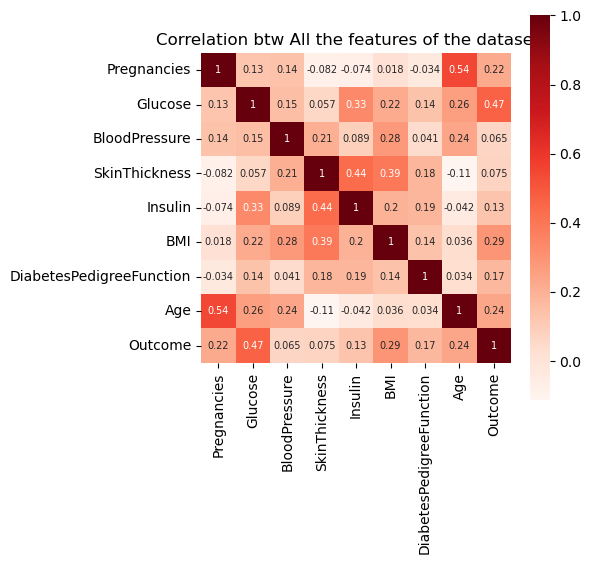

In [192]:
plt.figure(figsize=(5,5))
sns.heatmap(correlation , cbar=True, square=True , cmap='Reds', annot=True, annot_kws={'size':7})
plt.title('Correlation btw All the features of the dataset : ')
plt.show()


Data Preprocessing 

In [193]:
#seprating x and y
X = data.drop('Outcome',axis=1)
Y= data['Outcome']

In [194]:
print(X.shape)

(768, 8)


In [195]:
scalar = StandardScaler()

In [196]:
X = scalar.fit_transform(X)

In [197]:
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


# Splitting of data into test and training data 

In [198]:
X_train,X_test, Y_train , Y_test = train_test_split(X,Y , test_size=0.25, random_state=0)

In [199]:
print(X.shape,X_train.shape,X_test.shape)
print(Y.shape,Y_train.shape,Y_test.shape)

(768, 8) (576, 8) (192, 8)
(768,) (576,) (192,)


# Model Training 

In [200]:
model = LogisticRegression(learning_rate=0.15,no_of_iter=500)
model.fit(X_train,Y_train)

In [201]:
Y_pred_train = model.predict(X_train)
print(Y_pred_train.shape)
Train_accuracy = accuracy_score(Y_pred_train,Y_train)

(576,)


In [202]:
print('The Accuracy of the Training Data is : ',Train_accuracy*100,'%')

The Accuracy of the Training Data is :  76.5625 %


In [205]:
Y_pred_test1 = model.predict(X_test)
print(Y_pred_test1.shape)
Test_accuracy = accuracy_score(Y_test, Y_pred_test1)


(192,)


In [206]:
print('The Accuracy of the Test Data is : ',Test_accuracy*100,'%')

The Accuracy of the Test Data is :  80.20833333333334 %


Predictive System for the Model 

In [208]:
input_data = (0,0,0,0,0,0,0,0)
numpy = np.asarray(input_data)
reshaped = numpy.reshape(1,-1)
prediction = model.predict(reshaped)
if(prediction == 0):
    print('The Person is not diabetic')
else:
    print('The Person is diabetic')

The Person is not diabetic
